# End-to-End Linear Regression with PyTorch

---

This notebook represents the culmination of the foundational concepts from **Chapter 12** and introduces the complete training loop, which is central to all Deep Learning in PyTorch. The goal is to implement a simple **Linear Regression** model from scratch, using the tools we have learned.

It is the first complete, end-to-end Neural Network implementation in the chapter series.

### Key Topics and Implementations:

* **Synthetic Data Generation:** A simple linear dataset (`X_train` and `y_train`) is created and visualized to establish the basic regression problem (`y = Wx + b`).
* **Model Definition:**
    * A simple model is defined (likely using a single `nn.Linear` layer or a custom class inheriting from `nn.Module`) to perform the linear transformation.
    * The loss function (`nn.MSELoss` or equivalent) and optimizer (`optim.SGD` or equivalent) are instantiated.
* **The PyTorch Training Loop:** The core of the notebook demonstrates the entire training cycle:
    1.  **Forward Pass:** The input batch (`x_batch`) is passed through the `model` to calculate predictions (`y_pred`).
    2.  **Loss Calculation:** The difference between predictions and actual labels is computed (`loss_func`).
    3.  **Backward Pass (Autograd):** `loss.backward()` computes the gradients of the loss with respect to all trainable parameters.
    4.  **Parameter Update:** `optimizer.step()` updates the weights and biases using the calculated gradients.
    5.  **Gradient Reset:** `optimizer.zero_grad()` clears the gradients before the next iteration, preventing accumulation.
* **Results:** The final trained weight and bias parameters are printed, demonstrating that the model successfully learned the relationship in the synthetic data.

This notebook ties together **Tensors**, **DataLoaders**, **Model Definition**, and the **Autograd** (automatic differentiation) engine to fully train a working Neural Network model.

In [1]:
import numpy as np
import torch
import matplotlib.pyplot as plt

In [2]:
X_train = np.arange(10, dtype= 'float32').reshape(10, 1)
y_train = np.array([1.0, 1.3, 3.1, 2.0, 5.0,
        6.3, 6.6,7.4, 8.0, 9.0], dtype='float32')

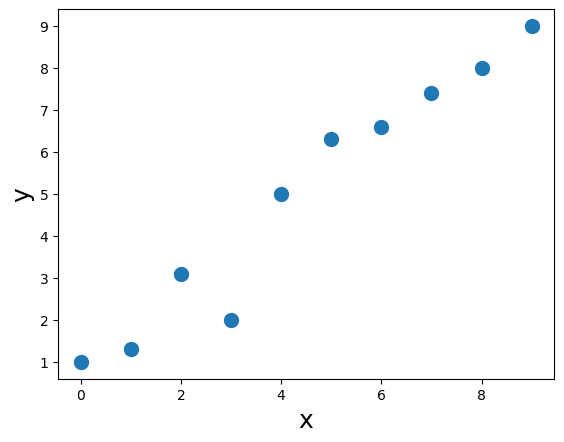

In [4]:
plt.plot(X_train, y_train, 'o', markersize= 10)
plt.xlabel('x', fontsize= 18)
plt.ylabel('y', fontsize= 18)
plt.show()

In [24]:
from torch.utils.data import TensorDataset
X_train_norm = (X_train - np.mean(X_train)) / np.std(X_train)
X_train_norm = torch.from_numpy(X_train_norm)
y_train_norm = torch.from_numpy(y_train)
train_ds = TensorDataset(X_train_norm, y_train_norm)
batch_size = 1 
train_dl= torch.utils.data.DataLoader(train_ds, batch_size, shuffle= True)

In [25]:
torch.manual_seed(1)
weight = torch.randn(1)
weight.requires_grad_()
bias = torch.zeros(1, requires_grad= True)
def model(xb):
    return xb @ weight + bias

In [26]:
def loss_func(input, target):
    return (target - input).pow(2).mean()

In [27]:
learning_rate = 0.001
epochs_number = 200
log_epoch = 10
for epoch in range(epochs_number):
    for (x_batch, y_batch) in train_dl:
        pred = model(x_batch)
        loss = loss_func(y_batch, pred)
        loss.backward()
        with torch.no_grad():
            weight -= learning_rate * weight.grad
            bias -= learning_rate * bias.grad
            weight.grad.zero_()
            bias.grad.zero_()
    if epoch % log_epoch == 0:
        print(f'Epoch {epoch}   Loss: {loss.item():.4f} ')

Epoch 0   Loss: 45.0782 
Epoch 10   Loss: 26.4366 
Epoch 20   Loss: 1.5918 
Epoch 30   Loss: 14.1307 
Epoch 40   Loss: 11.6038 
Epoch 50   Loss: 6.3084 
Epoch 60   Loss: 0.6349 
Epoch 70   Loss: 3.1374 
Epoch 80   Loss: 1.9999 
Epoch 90   Loss: 0.3133 
Epoch 100   Loss: 0.7653 
Epoch 110   Loss: 1.0039 
Epoch 120   Loss: 0.0235 
Epoch 130   Loss: 0.5176 
Epoch 140   Loss: 0.0759 
Epoch 150   Loss: 1.8789 
Epoch 160   Loss: 0.0008 
Epoch 170   Loss: 0.0866 
Epoch 180   Loss: 0.0646 
Epoch 190   Loss: 0.0011 


In [28]:
print(f'Final parameters : {weight.item()} , {bias.item()}')

Final parameters : 2.6696107387542725 , 4.879678249359131


In [35]:
X_test = np.linspace(0, 9, num= 100, dtype= 'float32').reshape(-1, 1)

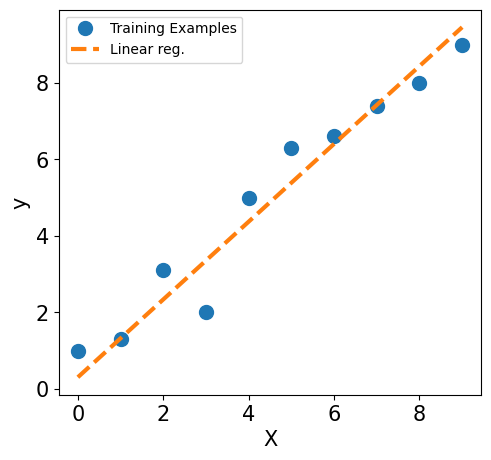

In [50]:
X_test_norm = (X_test - np.mean(X_test)) / np.std(X_test)
X_test_norm = torch.from_numpy(X_test_norm)
y_pred = model(X_test_norm).detach().numpy()
fig = plt.figure(figsize= (12, 5))
ax = fig.add_subplot(1, 2, 1)
plt.plot(X_train, y_train, 'o', markersize= 10)
plt.plot(X_test, y_pred, '--', lw= 3)
plt.legend(['Training Examples', 'Linear reg.'], fontsize= 10)
ax.set_xlabel('X', fontsize= 15)
ax.set_ylabel('y', fontsize= 15)
ax.tick_params(axis= 'both', which= 'major', labelsize= 15)
plt.show()

In [54]:
from torch import nn, optim
loss_func = nn.MSELoss(reduction= 'mean')
input_size = 1
output_size = 1
model = nn.Linear(input_size, output_size)
optimizer = optim.SGD(model.parameters(), lr= learning_rate)

In [57]:
for epoch in range(epochs_number):
    for (x_batch, y_batch) in train_dl:
        y_pred = model(x_batch)[:, 0]
        loss = loss_func(y_batch, y_pred)
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()
    if epoch % log_epoch == 0:
        print(f'Epoch {epoch} Loss: {loss.item():.4f}')

Epoch 0 Loss: 24.6684
Epoch 10 Loss: 29.1377
Epoch 20 Loss: 20.9207
Epoch 30 Loss: 0.1257
Epoch 40 Loss: 12.4922
Epoch 50 Loss: 1.7845
Epoch 60 Loss: 7.6425
Epoch 70 Loss: 2.5606
Epoch 80 Loss: 0.0157
Epoch 90 Loss: 0.7548
Epoch 100 Loss: 0.8412
Epoch 110 Loss: 0.4923
Epoch 120 Loss: 0.0823
Epoch 130 Loss: 0.0794
Epoch 140 Loss: 0.0891
Epoch 150 Loss: 0.0973
Epoch 160 Loss: 0.1043
Epoch 170 Loss: 0.1103
Epoch 180 Loss: 0.0009
Epoch 190 Loss: 0.0764


In [58]:
print(f'Final Parameters : Weight: {weight.item()}, Bias: {bias.item()}')

Final Parameters : Weight: 2.6696107387542725, Bias: 4.879678249359131
